In [1]:
import pandas as pd
import os, sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

from sparkvent.client import *
client = Client("../conf/config.yml")

In [10]:
# parse application information
parser = ParserFactory.get_parser('app', client.config.server)
data = parser.get_data()
data = pd.DataFrame.from_dict(data.values())

# data_scale - exe  # -cpu#-mem#-table1-table2
data['scale'] = data['name'].map(lambda name: name.split('-')[1])
# remove datascale not digit
data = data[data['scale'].map(lambda scale: scale.isdigit())]
data['scale'] = data['scale'].map(lambda scale: int(scale))
data['duration'] = data['duration'].map(lambda duration: float(duration))

# remove rows with abnormal names
data = data[data['name'].map(lambda name: name.startswith('Q23'))]

data['exec_num'] = data['name'].map(lambda name: int(name.split('-')[2]))
data['cpu_num'] = data['name'].map(lambda name: int(name.split('-')[3]))
data['mem_num'] = data['name'].map(lambda name: int(name.split('-')[4]))
data['tbl1_name'] = data['name'].map(lambda name: name.split('-')[5])
data['tbl2_name'] = data['name'].map(lambda name: name.split('-')[6])

In [3]:
# parse stage information
parser = ParserFactory.get_parser('stage', client.config.server)
stages = parser.get_data()
stages = pd.DataFrame.from_dict(stages.values())

stage0 = stages.loc[:,['app_id', 
                       'completionTime-0', 
                       'inputBytes-0', 
                       'shuffleWriteBytes-0', 
                       'stageId']]
stage1 = stages.loc[:,['app_id', 
                       'completionTime-1', 
                       'inputBytes-1', 
                       'shuffleWriteBytes-1', 
                       'stageId']]
stage2 = stages.loc[:,['app_id', 
                       'completionTime-2', 
                       'shuffleReadBytes-2',
                       'stageId']]
stage0 = stage0[stage0['stageId'] == 0]
stage1 = stage1[stage1['stageId'] == 1]
stage2 = stage2[stage2['stageId'] == 2]


In [7]:
stages.to_csv("./stages.csv")

In [12]:
data.to_csv("./app_data.csv")

In [14]:
data.rename(columns={'id':'app_id'}, inplace=True)

In [27]:
data = pd.merge(data, stage2, on='app_id')

In [28]:
data = data.drop('stageId', axis=1)

In [30]:
data.to_csv("./app_stage_data.csv")

In [31]:
data

,duration,app_id,name,scale,exec_num,cpu_num,mem_num,tbl1_name,tbl2_name,completionTime-0,inputBytes-0,shuffleWriteBytes-0,completionTime-1,inputBytes-1,shuffleWriteBytes-1,completionTime-2,shuffleReadBytes-2
0,32820.0,app-20170609054755-0157,Q23-2-2-4-4-nation-region,2,2,4,4,nation,region,3.215,3336.0,2988.0,3.174,5.840000e+02,7.180000e+02,5.595,3.706000e+03
1,295591.0,app-20170602170922-0431,Q23-5-4-4-4-partsupp-lineitem,5,4,4,4,partsupp,lineitem,11.534,600091310.0,321019395.0,106.638,3.865016e+09,2.958217e+09,161.516,3.279236e+09
2,241715.0,app-20170606103815-0309,Q23-4-2-4-4-partsupp-lineitem,4,2,4,4,partsupp,lineitem,8.048,479801578.0,256549712.0,82.230,3.087317e+09,2.366017e+09,130.755,2.622566e+09
3,92357.0,app-20170606120224-0358,Q23-5-2-4-4-customer-order,5,2,4,4,customer,order,7.596,122145118.0,93287449.0,18.338,8.705805e+08,5.516327e+08,43.567,6.449201e+08
4,82115.0,app-20170609082207-0270,Q23-4-2-4-4-customer-order,4,2,4,4,customer,order,6.136,97731955.0,74657187.0,17.430,6.957432e+08,4.419742e+08,37.631,5.166313e+08
5,41954.0,app-20170603095808-0892,Q23-5-4-4-4-nation-region,5,4,4,4,nation,region,4.605,3336.0,2988.0,4.504,5.840000e+02,7.180000e+02,7.667,3.706000e+03
6,94872.0,app-20170609032714-0046,Q23-1-2-4-4-partsupp-lineitem,1,2,4,4,partsupp,lineitem,5.504,118998996.0,63514715.0,22.254,7.601910e+08,5.870883e+08,42.869,6.506031e+08
7,64169.0,app-20170602153802-0356,Q23-4-4-4-4-supplier-partsupp,4,4,4,4,supplier,partsupp,9.057,479801578.0,256543769.0,8.005,5.718582e+06,4.666360e+06,26.197,2.612101e+08
8,67479.0,app-20170602144252-0339,Q23-4-4-4-4-part-partsupp,4,4,4,4,part,partsupp,9.001,479801578.0,253026735.0,11.516,9.693397e+07,7.012324e+07,26.396,3.231500e+08
9,276820.0,app-20170602104539-0251,Q23-3-4-4-4-partsupp-lineitem,3,4,4,4,partsupp,lineitem,9.215,359551313.0,192097578.0,65.850,2.310172e+09,1.770564e+09,155.810,1.962662e+09


In [34]:
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
trial_data = data.loc[:, ['duration', 'scale', 
                          'exec_num', 'cpu_num', 
                          'mem_num', 'completionTime-0',
                          'inputBytes-0', 'shuffleWriteBytes-0',
                          'completionTime-1', 'inputBytes-1', 
                          'completionTime-2', 'shuffleReadBytes-2']]
trial_data['cpu_num'] = trial_data['cpu_num'] / trial_data['exec_num']
trial_data['mem_num'] = trial_data['mem_num'] / trial_data['exec_num']
trial_data['duration'] = trial_data['duration'] / 1000

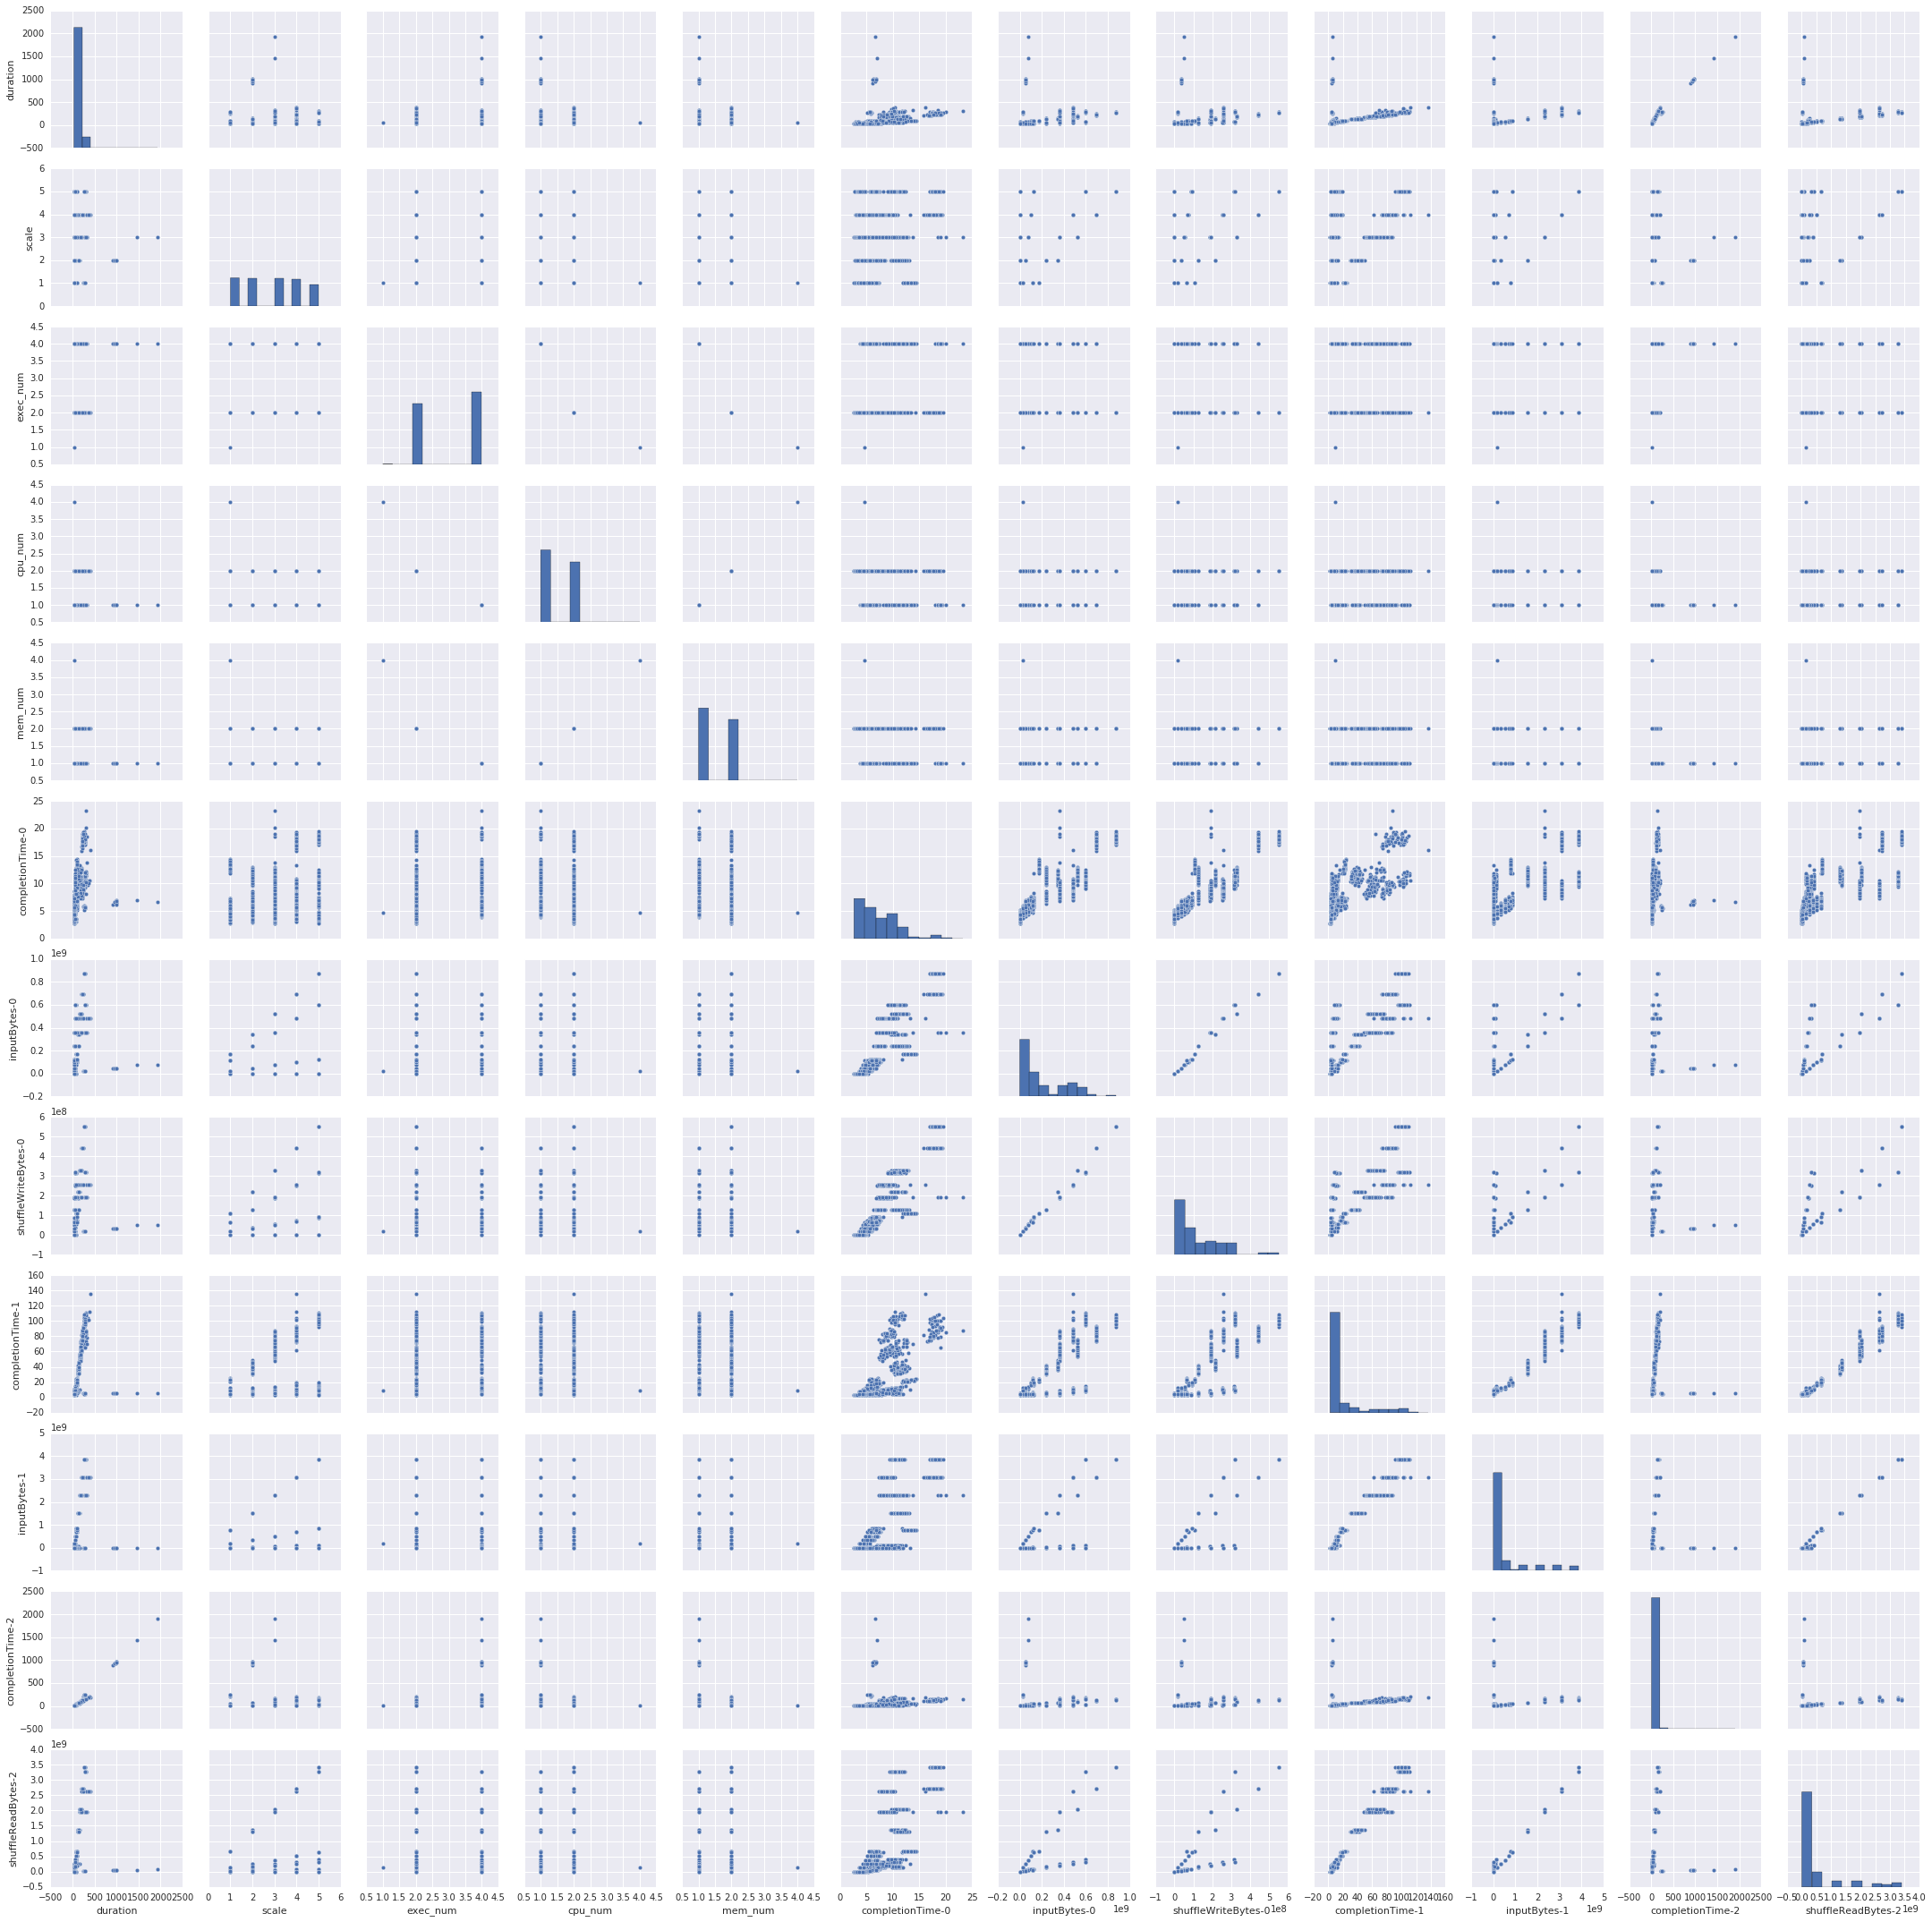

In [36]:
sns_plot = sns.pairplot(trial_data)

In [37]:
sns_plot.savefig("firt_try.pdf")

In [43]:
trial_data

,duration,scale,exec_num,cpu_num,mem_num
0,295.591,5,4,1.0,1.0
1,241.715,4,2,2.0,2.0
2,92.357,5,2,2.0,2.0
3,41.954,5,4,1.0,1.0
4,94.872,1,2,2.0,2.0
5,64.169,4,4,1.0,1.0
6,67.479,4,4,1.0,1.0
7,276.820,3,4,1.0,1.0
8,48.053,1,2,2.0,2.0
9,53.363,3,2,2.0,2.0
